### get the nodes and the links from wikipedia
https://en.wikipedia.org/wiki/List_of_Harry_Potter_characters
 but this might not be enough. this list only shows a little bit of the characters.

In [70]:
import requests
baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
content = "prop=revisions&rvprop=content"
dataformat ="format=json"

# get the list of characters from wiki

cha_list_word = 'List_of_Harry_Potter_characters'

title = "titles={}".format(cha_list_word)
query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)

r = requests.get(query)
text= r.text

In [71]:
cha_names=[]
spl = text.split('\\n*')
for each_spl in spl:
    contents = each_spl.split('\\u2013')
    if len(contents) >1:
#         print(contents[0])
        cha_names.append(contents[0])

In [77]:
print('number of characters from wikipedia:{}'.format(len(cha_names)))

number of characters from wikipedia:204


### try with fandom


In [1]:
import requests

hp_cat_url = 'https://harrypotter.fandom.com/api/v1/Articles/List?expand=1&category=Individuals&namespaces=0&limit=100'
r = requests.get(hp_cat_url)
response = r.json()

a = 0
sub_cat = []
for item in response['items']:
    a += 1
    print("{}\t{}\t({})".format(str(a),item['title'].encode(encoding='utf-8'),item['id']))
    title = str(item['title'].encode(encoding='utf-8'))
    sub_cat.append(title[2:-1])

1	b'Individual infobox test'	(191486)
2	b'Deities'	(163464)
3	b'Disowned individuals'	(167918)
4	b'Fictional characters'	(7830)
5	b'Homosexuals'	(218202)
6	b'Impersonated individuals'	(22241)
7	b'Individuals by house'	(191523)
8	b'Individuals by physical characteristics'	(214731)
9	b'Individuals by ability'	(9521)
10	b'Individuals by achievement'	(9522)
11	b'Individuals by allegiance'	(10221)
12	b'Individuals by class'	(15091)
13	b'Individuals by death'	(9905)
14	b'Individuals by deed'	(73564)
15	b'Individuals by era'	(122081)
16	b'Individuals by gender'	(9516)
17	b'Individuals by injury'	(9523)
18	b'Individuals by job'	(9538)
19	b'Individuals by marital status'	(119075)
20	b'Individuals by parentage'	(9645)
21	b'Individuals by place of origin'	(187776)
22	b'Individuals by place of residence'	(202826)
23	b'Individuals by relationship'	(10130)
24	b'Individuals by school'	(13832)
25	b'Individuals by species'	(9552)
26	b'Missing individuals'	(73563)
27	b'Objects with Personality'	(35200)


In [24]:
baseurl = "https://harrypotter.fandom.com/api/v1/Articles/List?"
expand = "expand=1"
namespaces = "namespaces=0"
limit = "limit={}".format(1000)


cat_list = []
# not subcat in side the cat, just the character list
direct_cat = []

depth_control = 6


# get the list from a (fake)category
# if not a category, return itself
def get_list(sub_cat_name,depth):
    depth+=1
    if depth >= depth_control:
        print('*Depth warning.')
        return []
    l = []
    category = "category={}".format(sub_cat_name)
    query = "{}{}&{}&{}&{}".format(baseurl, expand, category, namespaces, limit)

    mark = True
    
    r = requests.get(query)
    response = r.json()
    if 'items' not in response.keys():
        mark = False

    if mark:      
        cat_list.append(sub_cat_name)
        for item in response['items']:
            title = str(item['title'].encode(encoding='utf-8'))[2:-1]
            if title == sub_cat_name:
                continue
            if title in cat_list: # if this category already went through
                print('*REPEATED cate: {}'.format(title))
                continue
            if title.startswith('Locations'):
                print('*Locations cate: {}'.format(title))
                continue
            if 'Creatures' in title:
                print('*Creatures cate: {}'.format(title))
                continue
            l.extend(get_list(title,depth))
            
        print('exploring category:{}'.format(sub_cat_name))

    else:
        l = [sub_cat_name]

    return l


for i,each_sub_cat in enumerate(sub_cat[21:]):
    depth = 1
    print('*************************\nexploring category:{}\t{} START\n'.format(i,each_sub_cat))
    direct_cat.extend(get_list(each_sub_cat,depth))
    print('\nexploring category:{}\t{} FINISH\n*************************'.format(i,each_sub_cat))

*************************
exploring category:0	Individuals by place of residence START

exploring category:Dumbledore family
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
exploring category:Peverell family descendants
exploring category:Peverell family
exploring category:Potter family
exploring category:Godric's Hollow residents
exploring category:St Oswald's residents
exploring category:Individuals by place of residence

exploring category:0	Individuals by place of residence FINISH
*************************
*************************
exploring category:1	Individuals by relationship START

exploring category:Adoptees
*Depth warning.
*Depth warning.
*Depth warning.
exploring category:German family
*Depth warning.
exploring category:Higglebottom family
*Depth warning.
*Depth warning.
*Depth warning.
exploring category:Knighton family
*Depth warn

*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth w

exploring category:Circle of Khanna
*Depth warning.
*Depth warning.
exploring category:Dumbledore's Army defectors
exploring category:Dumbledore's Army
exploring category:Inquisitorial Squad
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
exploring category:Hogwarts dropouts
*Depth warning.
*Depth warning.
*Depth warning.
exploring category:Hogwarts expellees
exploring category:Non-graduate Hogwarts students
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
exploring category:Head Boys
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
exploring category:Duelling Club Captains
*Depth warning.
*Depth warning.
*Depth warning.
*Depth warning.
exploring category:Founder Duels champions
*Depth warning.
*Depth warning.
*Depth warning.
exploring category:Head Girls
*Depth warning.
*Depth warning.
*Depth warning.
exploring category:Hatstalls
*Depth warning.

In [25]:
len(direct_cat)

2103

In [26]:
direct_cat_1_10_set = set(direct_cat)
print(len(direct_cat_1_10_set))
import json
file_path = './data/cha_name_all_2/cha_names_(21-).json'
with open(file_path,'w') as f:
    json.dump(direct_cat,f)

1718


Get all nodes and remove the repeat ones and see the number of nodes.

In [2]:
folder_path = './data/cha_name_all_2/'

cha_all = []

import os
import json
file_list = os.listdir(folder_path)
for f_path in file_list:
    with open(os.path.join(folder_path,f_path),'r') as f:
        f_l = json.load(f)
    f_l = list(f_l)
    cha_all.extend(f_l)

In [3]:
cha_all = set(cha_all)
print('number of nodes:{}'.format(len(cha_all)))

number of nodes:4247


In [4]:
import json
with open('./data/cha_name_tmp.json','w') as f:
    json.dump(list(cha_all),f)

In [5]:
# get the name for file saving and reading
def file_saving_reading_name(s):
    s = s.replace(':','@')
    s = s.replace('/','$')
    return s

# get the name with ':' and '/'
def node_name(s):
    s = s.replace('@',':')
    s = s.replace('$','/')
    return s

In [6]:
import requests
from tqdm import tqdm

# download the pages
baseurl = "https://harrypotter.fandom.com/api.php?"
action = "action=query"
prop = "prop=revisions"
rvprop = "rvprop=content&rvparse=1"
format_ = "format=json"

fandom_folder = './data/cha_fandom_page'
len_cha = len(cha_all)

cha_all = list(cha_all)




# for each characters:
for i,each_cha in enumerate(cha_all):
    # deal with the character name
    each_cha = each_cha.replace(' ','_')  
    
    if r'\\' in each_cha:
        print(each_cha)
        continue
    
    print('downloading {}...\t{}\{}'.format(each_cha,i,len_cha))
    # query
    title = "titles={}".format(each_cha)
    query = "{}{}&{}&{}&{}&{}".format(baseurl, action,prop, title,rvprop,format_)
    
    try:
        r = requests.get(query)
        text= r.json()

        file_path = os.path.join(fandom_folder,file_saving_reading_name(each_cha)+'.json')

        with open(file_path,'w') as f:
            json.dump(text,f)
    except:
        print('*warning:{}'.format(each_cha))
    


downloading Unidentified_Muggle_woman_on_Chertsey_train...	0\4247
downloading Amycus_Carrow's_wand...	1\4247
downloading Parkin_(Seeker)...	2\4247
downloading Unidentified_male_Death_Eater_killed_on_the_Hogwarts_Seventh_Floor...	3\4247
downloading Catchpole...	4\4247
downloading Bogomil_Levski...	5\4247
downloading Curt_Hanger...	6\4247
downloading Jack_Sloper...	7\4247
downloading Matthew_Kettletoft...	8\4247
downloading Tanner_Van_Burm...	9\4247
downloading German-speaking_children...	10\4247
downloading Connolly...	11\4247
downloading Thora_Dinnet...	12\4247
downloading Portrait_of_a_wizard_in_blue...	13\4247
downloading Overweight_Ministry_of_Magic_worker...	14\4247
downloading Oraclitus_Spheer...	15\4247
downloading Lesley_Toddington...	16\4247
downloading A.J._Mennett...	17\4247
downloading Natalie_Fairbourne...	18\4247
downloading Unidentified_boy_during_the_1996_Quidditch_match_(I)...	19\4247
downloading Muggle-Born_Registration_Commission_courtroom...	20\4247
downloading Unide

downloading Lucinda_Thomsonicle-Pocus...	182\4247
downloading Jacob's_sibling...	183\4247
downloading Unidentified_Male_Death_Eater_(X)...	184\4247
downloading Merula_Snyde's_aunt...	185\4247
downloading Gideon_Prewett...	186\4247
downloading Cavalier...	187\4247
downloading Alastor_Moody's_spiders...	188\4247
downloading Cassiopeia_Black...	189\4247
downloading Shruti_Dev...	190\4247
downloading Weasleys'_Puffskein...	191\4247
downloading Bem...	192\4247
downloading Dolores_Umbridge...	193\4247
downloading Abraham_Grimblehawk...	194\4247
downloading Wilfred_the_Wistful...	195\4247
downloading Earl_of_Paunchley's_forced_servants...	196\4247
downloading Voice_of_lift_at_the_Ministry_of_Magic...	197\4247
downloading Unidentified_grandfather...	198\4247
downloading Part-troll...	199\4247
downloading Stark...	200\4247
downloading Barnabus_Blenkinsop...	201\4247
downloading Hortensia_Milliphutt...	202\4247
downloading Nugent_Potts...	203\4247
downloading Miras_Phlaras...	204\4247
downloadin

downloading Wainscott...	363\4247
downloading Flying_book...	364\4247
downloading Concepta_Battista...	365\4247
downloading Diego_Caplan...	366\4247
downloading Yolanda_Reedham...	367\4247
downloading Podric_Batworthy_XXIII...	368\4247
downloading Mafalda's_mother...	369\4247
downloading Hughes...	370\4247
downloading Unidentified_witness...	371\4247
downloading Irma_Pince's_wand...	372\4247
downloading Carmen_Garcia...	373\4247
downloading Alecto_Carrow's_wand...	374\4247
downloading Nigel_Wolpert's_wand...	375\4247
downloading Silas_Crump's_cat...	376\4247
downloading Myrtle_Warren's_father...	377\4247
downloading Esposito...	378\4247
downloading Part-vampire...	379\4247
downloading Humphrey_Belcher...	380\4247
downloading Unidentified_child_in_bubble...	381\4247
downloading Vault_Portrait...	382\4247
downloading Proudfoot...	383\4247
downloading Gideon_Scalby...	384\4247
downloading Penelope_Fawley...	385\4247
downloading Leopoldina_Smethwyck...	386\4247
downloading Eekins...	387\42

downloading Daryl_Morden...	558\4247
downloading Stoyanka_Grozda...	559\4247
downloading Ellen_Cracknell...	560\4247
downloading Painting_of_a_hippopotamus...	561\4247
downloading Giant...	562\4247
downloading Gondulphus_Graves...	563\4247
downloading Fat_ghost_in_stairwell...	564\4247
downloading Alex_Wednesbury...	565\4247
downloading Unidentified_soap_actress...	566\4247
downloading Roger_Malone...	567\4247
downloading Catullus_Spangle...	568\4247
downloading Tiberius...	569\4247
downloading Unidentified_Ravenclaw_fourth_years...	570\4247
downloading Ripper...	571\4247
downloading Barnaby_Snell...	572\4247
downloading Unidentified_Muggle_woman_(III)'s_son...	573\4247
downloading Dudley_Dursley...	574\4247
downloading Jake_Farley...	575\4247
downloading Eglantine_Lestrange...	576\4247
downloading Lee_Jordan's_father...	577\4247
downloading Sue_Li...	578\4247
downloading Amy_Benson...	579\4247
downloading Wand_weigher...	580\4247
downloading Black_Magic...	581\4247
downloading Harry_T

downloading Rionach_O'Neal...	745\4247
downloading Ella_Max...	746\4247
downloading Unidentified_Wampanoag_children...	747\4247
downloading Janus_Thickey...	748\4247
downloading Nicholas_de_Mimsy-Porpington's_executioner...	749\4247
downloading James_Killick...	750\4247
downloading F\xc3\xa9licule_Lestrange...	751\4247
*warning:F\xc3\xa9licule_Lestrange
downloading The_Toad...	752\4247
downloading Saul_Croaker...	753\4247
downloading Zygmunt_Budge's_great-grandmother...	754\4247
downloading Isaac_Newton...	755\4247
downloading Google_Stump...	756\4247
downloading Troy_Duvall...	757\4247
downloading Gryffindor_individual_infobox...	758\4247
downloading Stewart...	759\4247
downloading Vicky_Bishopper...	760\4247
downloading Biko_Kisawahi...	761\4247
downloading Eliana...	762\4247
downloading Apothecary_shopkeeper...	763\4247
downloading Brian...	764\4247
downloading Dorian_Fungbury...	765\4247
downloading Malcolm_Ilminster...	766\4247
downloading Erika_Rath's_father...	767\4247
downloadi

downloading Filemina_Alchin...	928\4247
downloading Charles_Dickens...	929\4247
downloading Cyrille_Lestrange_(IV)...	930\4247
downloading Unidentified_Sleeping_Headmaster_with_Paper...	931\4247
downloading Matheus_Limusa...	932\4247
downloading Centaur...	933\4247
downloading Quidditch_referee...	934\4247
downloading Luciano_Limus...	935\4247
downloading Unidentified_Azkaban_Escapee...	936\4247
downloading Hogwarts_Express_driver...	937\4247
downloading Molly_Weasley...	938\4247
downloading Molly_Weasley's_mother...	939\4247
downloading Aragog...	940\4247
downloading Rabat...	941\4247
downloading Kreacher...	942\4247
downloading Fleur_Delacour...	943\4247
downloading Unidentified_card-playing_boy...	944\4247
downloading Dougal_McGregor's_children...	945\4247
downloading Peverell_brothers...	946\4247
downloading Emma_Vane's_mother...	947\4247
downloading Unidentified_Snatcher...	948\4247
downloading Hannah_Abbott's_mother...	949\4247
downloading House_of_Black_house-elves...	950\4247
d

downloading Parkin_(Keeper)...	1114\4247
downloading Hogwarts_kitchen_painting...	1115\4247
downloading Eugene_McAllister...	1116\4247
downloading Jack_"BtR"_Saxon/Babbling_draft...	1117\4247
*warning:Jack_"BtR"_Saxon/Babbling_draft
downloading Unidentified_Death_Eater_killed_by_Kingsley_Shacklebolt...	1118\4247
downloading Cerberus_Langarm...	1119\4247
downloading Wizarding_Wireless_Network_News...	1120\4247
downloading Unidentified_Hogwarts_student_interested_in_earth_magic...	1121\4247
downloading Sirius_Black_II...	1122\4247
downloading Tilly_Monk...	1123\4247
downloading Dunbar_Oglethorpe...	1124\4247
downloading Filius_Flitwick...	1125\4247
downloading Elite_No-Maj...	1126\4247
downloading Banga_O'Deluga...	1127\4247
downloading Harriet_Ellesmere...	1128\4247
downloading Dorcus_Twelvetrees's_wand...	1129\4247
downloading Unidentified_female_Common_Welsh_Green...	1130\4247
downloading Flurry...	1131\4247
downloading Adrian...	1132\4247
downloading The_Warlock's_friends...	1133\424

downloading Hestia_Carrow...	1294\4247
downloading Unidentified_witch_who_tried_to_make_an_Aprils_Fool_on_Alastor_Moody_at_Aprils_Fools_Day...	1295\4247
downloading Grawp...	1296\4247
downloading Jason_Caffoe...	1297\4247
downloading Oliver_Wood's_wand...	1298\4247
downloading Kay_Formby...	1299\4247
downloading Sinistra_Lowe...	1300\4247
downloading Emmeline_Vance's_wand...	1301\4247
downloading Unidentified_Madam_Malkin's_Robes_for_All_Occasions_employee...	1302\4247
downloading Eagle...	1303\4247
downloading Rod_Freddy...	1304\4247
downloading Baruffio's_wife...	1305\4247
downloading Owen_Cauldwell...	1306\4247
downloading Selma...	1307\4247
downloading Unidentified_Light_Male_Death_Eater_(I)...	1308\4247
downloading Unidentified_Goblin_at_Gringotts_in_1998_(III)...	1309\4247
downloading Yoshihiro_Suzuki...	1310\4247
downloading Sean_Ogbourne...	1311\4247
downloading Security_Warlock...	1312\4247
downloading Ginevra_Weasley...	1313\4247
downloading Cornelius_Fudge's_wand...	1314\424

downloading Gato_Felinus...	1473\4247
downloading Denison_Frisby...	1474\4247
downloading Joe_Laurie...	1475\4247
downloading Portrait_of_a_mother_and_baby...	1476\4247
downloading William_Weasley's_wand...	1477\4247
downloading Unidentified_Ollivander's_assistant...	1478\4247
downloading Unidentified_Slytherin_knight...	1479\4247
downloading Unidentified_male_Egyptian_in_the_Weasleys'_photograph...	1480\4247
downloading Martine_Copplestone...	1481\4247
downloading Genevieve_Bladt...	1482\4247
downloading Sanford_Humberston...	1483\4247
downloading Count_Dracula...	1484\4247
downloading Rosier_(male)...	1485\4247
downloading The_Maiden's_kinsfolk...	1486\4247
downloading Billy_Stubbs...	1487\4247
downloading H_._O._Lama...	1488\4247
downloading Glenda_Chittock...	1489\4247
downloading Daryle...	1490\4247
downloading Torquil_Travers...	1491\4247
downloading Winogrand...	1492\4247
downloading Maynard_Hatton...	1493\4247
downloading Portrait_of_a_group_of_journeying_wizards...	1494\4247
d

downloading Carrot_Wand...	1652\4247
downloading Obituaries...	1653\4247
downloading Babayaga...	1654\4247
downloading Gareth_Pewsey...	1655\4247
downloading Noriko_Sato...	1656\4247
downloading Unidentified_male_Auror_at_Hogwarts...	1657\4247
downloading Patrick_Delaney-Podmore...	1658\4247
downloading Buckbeak...	1659\4247
downloading Riley_Frazer...	1660\4247
downloading Squib...	1661\4247
downloading Lorcan_McLaird...	1662\4247
downloading Unidentified_boy_in_the_Great_Hall_(III)...	1663\4247
downloading Henry_Potter...	1664\4247
downloading Dungeon_Corridor_Slytherin_prefect_(II)...	1665\4247
downloading Curse-Breaker...	1666\4247
downloading Court_Scribe...	1667\4247
downloading Beatrix_Bloxam's_cousins...	1668\4247
downloading Marina_Sanchez...	1669\4247
downloading Peter_G._(Little_Hangleton)...	1670\4247
downloading Robert_Hawking...	1671\4247
downloading Stebbins_(Marauder-era)...	1672\4247
downloading Unidentified_dumpy_Wizengamot_member_with_a_large_black_moustache...	1673\

downloading Mercy_Wardwell...	1834\4247
downloading Gilderoy_Lockhart's_sisters...	1835\4247
downloading Grumble...	1836\4247
downloading Ministry_Official_No._39423...	1837\4247
downloading Emma_Vanity_(Gryffindor)...	1838\4247
downloading Stuart_McKinley...	1839\4247
downloading Franciscus_Fieldwake...	1840\4247
downloading Bastien_Janvier...	1841\4247
downloading Septimus_Weasley...	1842\4247
downloading Damocles_Rowle...	1843\4247
downloading Wealthy_man_who_owned_the_Riddle_House...	1844\4247
downloading Randolph_Spudmore...	1845\4247
downloading Brown...	1846\4247
downloading Eupraxia_Mole...	1847\4247
downloading Alex_Sykes_(I)...	1848\4247
downloading Everard...	1849\4247
downloading Mordecai_Berrycloth...	1850\4247
downloading Urquhart...	1851\4247
downloading Linda_Chaddesley...	1852\4247
downloading Mykew_Gregorovitch...	1853\4247
downloading Hufflepuff_Wizard_Duelling_Champion...	1854\4247
downloading Thelma_Holmes...	1855\4247
downloading Davet_Dumont...	1856\4247
download

downloading Quirinus_Quirrell...	2017\4247
downloading Magical_Menagerie_salesman...	2018\4247
downloading Melania_Macmillan...	2019\4247
downloading Omar_Shaw...	2020\4247
downloading Skye_Parkin's_cousin...	2021\4247
downloading Lachlan_the_Lanky...	2022\4247
downloading Rosie_Goodwin...	2023\4247
downloading Loxias...	2024\4247
downloading Manager_at_Eeylops_Owl_Emporium...	2025\4247
downloading Unidentified_Sleeping_Headmaster_with_Castle_Sketch...	2026\4247
downloading Callidora_Black...	2027\4247
downloading Beatrix_Bloxam's_aunt...	2028\4247
downloading Caesar...	2029\4247
downloading Eddie_Carmichael...	2030\4247
downloading Stephen_Cornfoot...	2031\4247
downloading Prime_Minister's_predecessor...	2032\4247
downloading Unidentified_photographer_(I)...	2033\4247
downloading Order_of_the_Phoenix_meetings...	2034\4247
downloading Wandless...	2035\4247
downloading Fred_Weasley's_wand...	2036\4247
downloading Pidgron_sisters...	2037\4247
downloading Valerie_Valion...	2038\4247
downl

downloading Anderson...	2194\4247
downloading M._Mina...	2195\4247
downloading Mark_Evans...	2196\4247
downloading Jack_"BtR"_Saxon/Flitwick_draft...	2197\4247
*warning:Jack_"BtR"_Saxon/Flitwick_draft
downloading Giffard_Abbott...	2198\4247
downloading Primpernelle...	2199\4247
downloading Kellah...	2200\4247
downloading Garrick_Ollivander...	2201\4247
downloading Portly_ghost...	2202\4247
downloading Josette_Kelius...	2203\4247
downloading Unidentified_Sleeping_Headmaster_with_Starmap...	2204\4247
downloading Edric_Vosper...	2205\4247
downloading Mordicus_Egg...	2206\4247
downloading Heliotrope_Wilkins...	2207\4247
downloading Abigail_Nicola...	2208\4247
downloading Shepherdess...	2209\4247
downloading Joseph_Edwards...	2210\4247
downloading Chris_Lunney...	2211\4247
downloading Dominic_Maestro...	2212\4247
downloading Head_of_the_Muggle-Born_Registration_Commission...	2213\4247
downloading Warlock_(The_Warlock's_Hairy_Heart)...	2214\4247
downloading Venomous_Tentacula...	2215\4247
do

downloading Mustafa_Kama...	2378\4247
downloading Glen...	2379\4247
downloading Vibes_Twins...	2380\4247
downloading Wilhelmina_Tuft...	2381\4247
downloading Unidentified_portrait_in_Malfoy_Manor_(II)...	2382\4247
downloading Newton_Scamander...	2383\4247
downloading Constance_Pickering's_sister...	2384\4247
downloading Corvus_Lestrange_(I)...	2385\4247
downloading Erie_Yenning...	2386\4247
downloading Sirius_Black_I...	2387\4247
downloading Augusta_Longbottom...	2388\4247
downloading Merula_Snyde's_mother...	2389\4247
downloading Garrick_Ollivander's_mother...	2390\4247
downloading Albus_Potter's_owl...	2391\4247
downloading Kingsley_Shacklebolt...	2392\4247
downloading Alberto_Macellarius...	2393\4247
downloading Sphinx...	2394\4247
downloading Jack_"BtR"_Saxon/Unidentified_female_Hogwarts_teacher_draft...	2395\4247
*warning:Jack_"BtR"_Saxon/Unidentified_female_Hogwarts_teacher_draft
downloading Aviemore_station_master...	2396\4247
downloading Unidentified_Sleeping_Headmistress_with_

downloading Aki_Sugiyama...	2559\4247
downloading Bridget_(journalist)...	2560\4247
downloading Royston_Idlewind...	2561\4247
downloading Martha_Steward_II's_husband...	2562\4247
downloading Barnaby_Lee...	2563\4247
downloading Derek_(turtle_talker)...	2564\4247
downloading Ignatia_Wildsmith...	2565\4247
downloading Agnes...	2566\4247
downloading Unidentified_fans_of_Gilderoy_Lockhart...	2567\4247
downloading Merula_Snyde's_gang...	2568\4247
downloading Philip_K....	2569\4247
downloading Dorea_Black...	2570\4247
downloading Unidentified_Chinese_Fireball's_offspring...	2571\4247
downloading Igor_Brand...	2572\4247
downloading Shifty_wizard...	2573\4247
downloading Circe...	2574\4247
downloading Apparition_Instructor...	2575\4247
downloading Peeves...	2576\4247
downloading Celestina_Warbeck's_son...	2577\4247
downloading Roderick_Plumpton...	2578\4247
downloading Hadrian_Whittle...	2579\4247
downloading Ana_de_Lebron...	2580\4247
downloading Chester_Hidland...	2581\4247
downloading Chess

downloading Ubbly...	2745\4247
downloading Julius_Dehoff...	2746\4247
downloading Waiters_at_William_Weasley_and_Fleur_Delacour's_wedding...	2747\4247
downloading Unidentified_Clumsy_Hogwarts_Violist...	2748\4247
downloading Second_semi-finalist_of_the_1379_duelling_contest...	2749\4247
downloading Devil...	2750\4247
downloading Showizbiz...	2751\4247
downloading Ollivander_(382_B.C._era)...	2752\4247
downloading Portrait_of_a_man_on_a_flying_carpet...	2753\4247
downloading J._B._Yabsley...	2754\4247
downloading Mina...	2755\4247
downloading Steve_Laughalot...	2756\4247
downloading Terrence_Fogarty...	2757\4247
downloading Unidentified_two_elderly_Wizengamot_witches...	2758\4247
downloading Duke_of_Wellington...	2759\4247
downloading Hufflepuff_boy_that_blames_Harry_Potter_(I)...	2760\4247
downloading Levina_Monkstanley...	2761\4247
downloading V._Hahn...	2762\4247
downloading Unidentified_1986-1987_Defence_Against_the_Dark_Arts_teacher...	2763\4247
downloading Ismelda_Murk's_paternal_

downloading Robin_McTighe...	2931\4247
downloading Viktor_Krum's_mother...	2932\4247
downloading Ministry_of_Magic_Visitor_No._09603...	2933\4247
downloading Ludovic_Bagman's_father...	2934\4247
downloading McHavelock...	2935\4247
downloading Queenbee...	2936\4247
downloading Lamont...	2937\4247
downloading Ben_Copper...	2938\4247
downloading Diane_Carter...	2939\4247
downloading Mary_Doyle...	2940\4247
downloading Caua_Nemerus...	2941\4247
downloading William_Shakespeare...	2942\4247
downloading Painting_of_a_giraffe...	2943\4247
downloading Magical_Menagerie_saleswoman...	2944\4247
downloading Cecily...	2945\4247
downloading Unidentified_white_haired_wizard_during_the_Battle_of_Hogwarts...	2946\4247
downloading Franklin_Greenwood...	2947\4247
downloading Unidentified_Gringotts_spokesgoblin...	2948\4247
downloading Murphy_McNully...	2949\4247
downloading McGonagalls'_cat...	2950\4247
downloading Grubby-looking_St_Mungo's_patient...	2951\4247
downloading Unidentified_Gryffindor_seeker.

downloading Talbott_Winger's_father...	3112\4247
downloading William_(Pukwudgie)...	3113\4247
downloading My_Teeth...	3114\4247
downloading Ministry_of_Magic_Fog...	3115\4247
downloading Anita_Macduff...	3116\4247
downloading Blinkhorn...	3117\4247
downloading Unidentified_police_officer_(I)...	3118\4247
downloading Zonko...	3119\4247
downloading Laurence_Wakefield...	3120\4247
downloading Stephen_Swain...	3121\4247
downloading Magenta_Comstock...	3122\4247
downloading Steve_McClaren...	3123\4247
downloading Parvati_Patil...	3124\4247
downloading Jacob's_wand...	3125\4247
downloading Eleanor_Sarah_Gibbs...	3126\4247
downloading Euphra\xc3\xaflde_Lestrange...	3127\4247
*warning:Euphra\xc3\xaflde_Lestrange
downloading Joshua_Flexson...	3128\4247
downloading Unidentified_boy_who_attended_Charm_School...	3129\4247
downloading Brutus_Scrimgeour...	3130\4247
downloading Abernathy's_wand...	3131\4247
downloading Erling_the_Great...	3132\4247
downloading Dylan_Marwood's_wand...	3133\4247
downl

downloading Frazier...	3293\4247
downloading Marcus_Flint...	3294\4247
downloading J._E._Prewitt...	3295\4247
downloading Unidentified_clown...	3296\4247
downloading Erich_Ludendorff...	3297\4247
downloading Lucas_Bargeworthy...	3298\4247
downloading Unidentified_grubby-looking_wizard...	3299\4247
downloading Minaka_Hirakata...	3300\4247
downloading Marjorie_Dursley...	3301\4247
downloading Unidentified_Aurors...	3302\4247
downloading Kevin_Hopwood...	3303\4247
downloading Sophia_Prickett...	3304\4247
downloading Jenna_Jovius...	3305\4247
downloading Evangeline_Orpington...	3306\4247
downloading Burkinab\xc3\xa9_Ministers_for_Magic...	3307\4247
*warning:Burkinab\xc3\xa9_Ministers_for_Magic
downloading E._Wheeler...	3308\4247
downloading Indira_Choudry...	3309\4247
downloading Viktor_Krum's_grandfather...	3310\4247
downloading Toby_Gleaves...	3311\4247
downloading Unidentified_Non-magique_Mother...	3312\4247
downloading Falco_Tremblay...	3313\4247
downloading Neville_Longbottom's_second

downloading Janek_&_Pelowski_Co....	3476\4247
downloading Satoru_Iida...	3477\4247
downloading Unidentified_frizzy-haired_Wizengamot_member...	3478\4247
downloading Unidentified_Gryffindor_member_of_Dumbledore's_Army...	3479\4247
downloading Sakura_Akagi...	3480\4247
downloading Lewis_Thorverton...	3481\4247
downloading Jodelle_Lestrange...	3482\4247
downloading Johann_Agardh...	3483\4247
downloading Amycus_Carrow...	3484\4247
downloading Thomas_More...	3485\4247
downloading Fallen_Fifty...	3486\4247
downloading Falco_Aesalon...	3487\4247
downloading Faris_Spavin's_centaur_assailant...	3488\4247
downloading Celestina_Warbeck's_second_husband...	3489\4247
downloading William_Weasley's_South_American_pen-friend...	3490\4247
downloading Charles_Weasley's_wand...	3491\4247
downloading Harvey_Ridgebit...	3492\4247
downloading Oakden_Hernshaw...	3493\4247
downloading Gwendoline_Hedgeflower...	3494\4247
downloading Lara_Von_Sigg...	3495\4247
downloading Williamson...	3496\4247
downloading Eva

downloading Austin_Guthrie...	3655\4247
downloading Sujita_Tande...	3656\4247
downloading Workmen_at_Tottenham_Court_Road...	3657\4247
downloading Unidentified_blonde_Slytherin_girl...	3658\4247
downloading Ravenclaw_Lad...	3659\4247
downloading Poppy_Pomfrey's_wand...	3660\4247
downloading Tomkins...	3661\4247
downloading Abraham...	3662\4247
downloading Dodie_Smith...	3663\4247
downloading Unidentified_Princess...	3664\4247
downloading Constance_Pickering's_muggle_grandfather...	3665\4247
downloading Ginger_(musician)...	3666\4247
downloading Draco_Malfoy...	3667\4247
downloading Lenelle_Paraison...	3668\4247
downloading Boil-ridden_house-elf...	3669\4247
downloading Rosalyn_Ewhurst...	3670\4247
downloading Rachael_Codnor...	3671\4247
downloading Mafalda...	3672\4247
downloading Chie_Shinohara...	3673\4247
downloading Lina_Tande...	3674\4247
downloading Geoffrey_Hooper...	3675\4247
downloading Ronan...	3676\4247
downloading Shanice_Higgins...	3677\4247
downloading Rosmerta...	3678\42

downloading Gordon_Pummell_(I)...	3841\4247
downloading Eulalie_Hicks...	3842\4247
downloading Blythe_Parkin...	3843\4247
downloading Barnaby_Ollerton...	3844\4247
downloading Grimwold_Jorkins...	3845\4247
downloading Fubster...	3846\4247
downloading Unidentified_Choir_Member_(I)...	3847\4247
downloading Hirohisa_Kubo...	3848\4247
downloading Tom_Riddle's_wand...	3849\4247
downloading Hildegarde_Lafarge...	3850\4247
downloading Prime_Minister's_political_opponent...	3851\4247
downloading Leonard_Jewkes...	3852\4247
downloading Sidney_Puckeridge...	3853\4247
downloading Nerys_Orpington...	3854\4247
downloading Septimus_Malfoy...	3855\4247
downloading Evening_Prophet...	3856\4247
downloading Inferius...	3857\4247
downloading Malfoy_Manor_front_gates...	3858\4247
downloading Severus_Snape...	3859\4247
downloading Marsh...	3860\4247
downloading TongueBurners_Ltd...	3861\4247
downloading Seraphina_Picquery's_wand...	3862\4247
downloading Distractible_Douglas...	3863\4247
downloading Mason's

*warning:Burkinab\xc3\xa9_individuals
downloading Alasdair_Maddock...	4032\4247
downloading Jo_King_(Gryffindor)...	4033\4247
downloading Unidentified_pet-owner_in_Knockturn_Alley...	4034\4247
downloading Potioneer...	4035\4247
downloading Moran...	4036\4247
downloading Newton_Scamander's_nifflers...	4037\4247
downloading Eargit_the_Ugly...	4038\4247
downloading Tragedies...	4039\4247
downloading Wu_Han_Po...	4040\4247
downloading Book_of_Potions...	4041\4247
downloading Ministry_of_Magic_Visitor_No._09602...	4042\4247
downloading Unidentified_bushily_whiskered_Ministry_of_Magic_employee...	4043\4247
downloading Edgecombe...	4044\4247
downloading Unnamed_Kwidditch_players...	4045\4247
downloading Wilkes...	4046\4247
downloading Cygnus_Black_II...	4047\4247
downloading Elphinstone_Forgot...	4048\4247
downloading Shikoba_Wolfe...	4049\4247
downloading Brian_Gallagher...	4050\4247
downloading Unidentified_female_Chinese_Fireball...	4051\4247
downloading Poppy_Pomfrey's_Death_Eater_Opponen

downloading Gianna_Grace_Marie...	4217\4247
downloading Josephine_Marat...	4218\4247
downloading Elora_Dunn...	4219\4247
downloading Romilda_Goshawk...	4220\4247
downloading Fox_near_Spinner's_End...	4221\4247
downloading Edna_Patridge...	4222\4247
downloading Alistair_Ballcocke...	4223\4247
downloading Ragnuk...	4224\4247
downloading Enid_Pettigrew...	4225\4247
downloading Naasz...	4226\4247
downloading Koldovstoretz_potions_champion...	4227\4247
downloading Douglas_Steward...	4228\4247
downloading Laurentia_Fletwock...	4229\4247
downloading Niko_Nenad...	4230\4247
downloading Salazar_Slytherin...	4231\4247
downloading Unidentified_Slytherin_boy_(I)...	4232\4247
downloading Maledictus...	4233\4247
downloading Painting_of_a_wolfhound...	4234\4247
downloading Unidentified_frowning_Ministry_of_Magic_wizard_who_murmured_instructions_to_a_quill...	4235\4247
downloading Sam_(dog)...	4236\4247
downloading Agnes's_son...	4237\4247
downloading Craig_Bowker_Junior...	4238\4247
downloading Dursl

In [7]:
# after getting all files-> file the links and store them

# 1. get all the notes
all_nodes = []
all_cha_json_files = os.listdir(fandom_folder)
for each in all_cha_json_files:
    cha_name = node_name(each.split('.json')[0])
    all_nodes.append(cha_name)

print('number of nodes:{}'.format(len(all_nodes)))
with open('./data/all_nodes.json','w') as f:
    json.dump(list(all_nodes),f)

number of nodes:4264


In [8]:
# before step 2 define a function to get the link list from a text
# using 正则 正则英文怎么说忘了！
import re
def get_links(text):
    pattern=re.compile(r'<a href="/wiki/.*?" title=".*?">')
    result= pattern.findall(str(text))
    list_link=[]
    for x in result:
        x=x.split(' title')
        href=x[0].split('href="/wiki/')[-1].split('"')[0]
        list_link.append(href)
    return list_link

In [9]:
# 2. in each json file get the links and stroe it in a dictionary
# format{node_name:[linked_node_1, linked_node_2, ... ], ...}

node_edges = {}

num_of_nodes = len(all_nodes)
folder = './data/cha_fandom_page/'

for i,node in enumerate(all_nodes):
    # 2.1 get the json file 
    json_path = os.path.join(folder,file_saving_reading_name(node)+'.json')
    with open(json_path,'r') as f:
        text = json.load(f)

#     print(str(text)[:30])
    
    # get the links from text
    raw_links = get_links(text)
    
    # avoid repeating
    raw_links = list(set(raw_links))
    
    # check if links are from the nodes_list
    true_links = []
    for link in raw_links:
        if link in all_nodes:
            true_links.append(link)
    
    node_edges[node] = true_links
    print('{}/{}\tnode {} has {} links'.format(i+1,num_of_nodes,node,len(true_links)))

1/4264	node 16th_century_Potions_Professor has 99 links
2/4264	node 1992_Gryffindor-Slytherin_Quidditch_match_spectators has 12 links
3/4264	node 1996_Gryffindor_Quidditch_Keeper_trials_spectators has 4 links
4/4264	node 2-Headed_Baby has 0 links
5/4264	node A.J._Mennett has 0 links
6/4264	node A._Criddle has 0 links
7/4264	node A._Fenetre has 69 links
8/4264	node A._Osborn has 1 links
9/4264	node Aamir_Loonat has 0 links
10/4264	node Abbott has 6 links
11/4264	node Abel_Treetops has 1 links
12/4264	node Aberforth_Dumbledore has 116 links
13/4264	node Abernathy's_wand has 4 links
14/4264	node Abernathy has 64 links
15/4264	node Abigail_Nicola has 139 links
16/4264	node Abigail_Pugh has 0 links
17/4264	node Abigail_R._Cankus has 0 links
18/4264	node Able_Fleming has 46 links
19/4264	node Able_Spudmore has 2 links
20/4264	node Abracadabra has 67 links
21/4264	node Abraham has 4 links
22/4264	node Abraham_Grimblehawk has 5 links
23/4264	node Abraham_Peasegood has 1 links
24/4264	node Abra

210/4264	node Antioch_Peverell has 39 links
211/4264	node Antonia_Creaseworthy has 5 links
212/4264	node Antonin_Dolohov has 76 links
213/4264	node Antonio has 5 links
214/4264	node Apolline_Delacour's_mother has 7 links
215/4264	node Apolline_Delacour has 13 links
216/4264	node Apothecary_shopkeeper has 2 links
217/4264	node Apparition_Instructor has 1 links
218/4264	node Applewood_and_dragon_heartstring_wand has 2 links
219/4264	node Arabella_Figg's_parents has 4 links
220/4264	node Arabella_Figg has 86 links
221/4264	node Aragog has 22 links
222/4264	node Araminta_Meliflua_Black has 16 links
223/4264	node Aravind_C. has 0 links
224/4264	node Archana_Shetty has 0 links
225/4264	node Archer_Evermonde has 36 links
226/4264	node Archibald_Alderton has 126 links
227/4264	node Archibald_Bennett has 42 links
228/4264	node Archibald_Bienbon has 1 links
229/4264	node Archie_Aymslowe has 3 links
230/4264	node Architect_of_Hogwarts has 26 links
231/4264	node Arcturus_Black_I has 14 links
232/4

400/4264	node Bernard_Lockwood has 2 links
401/4264	node Bernard_Maltby has 0 links
402/4264	node Bernard_Tremblay has 8 links
403/4264	node Bernie has 15 links
404/4264	node Bertha_Jorkins's_aunt has 3 links
405/4264	node Bertha_Jorkins's_second_cousin has 1 links
406/4264	node Bertha_Jorkins has 23 links
407/4264	node Berthilde_Roche has 46 links
408/4264	node Bertie_Bott has 125 links
409/4264	node Bertie_Higgs has 3 links
410/4264	node Bertram_Aubrey has 2 links
411/4264	node Beryl has 46 links
412/4264	node Bespectacled_Slytherin_girl has 1 links
413/4264	node Bethany_Harrison has 6 links
414/4264	node Bethany_Swordbane has 1 links
415/4264	node Betty_Bickering has 140 links
416/4264	node Betty_Braithwaite has 67 links
417/4264	node Betty_Burgess has 2 links
418/4264	node Bhavana_Patel has 3 links
419/4264	node Bhupen_Shastri has 0 links
420/4264	node Big_Mic has 3 links
421/4264	node Biko_Kisawahi has 0 links
422/4264	node Bilius has 18 links
423/4264	node Bilius_Finbok has 43 li

612/4264	node Cedric_Diggory has 219 links
613/4264	node Celestina_Warbeck's_father has 3 links
614/4264	node Celestina_Warbeck's_first_husband has 1 links
615/4264	node Celestina_Warbeck's_mother has 3 links
616/4264	node Celestina_Warbeck's_second_husband has 2 links
617/4264	node Celestina_Warbeck's_son has 4 links
618/4264	node Celestina_Warbeck's_wand has 1 links
619/4264	node Celestina_Warbeck has 129 links
620/4264	node Celia_Barnett has 1 links
621/4264	node Centaur has 36 links
622/4264	node Centaur_individual_infobox has 0 links
623/4264	node Cerberus_Langarm has 46 links
624/4264	node Ceremony_official has 3 links
625/4264	node Chadwick_Boot's_wand has 8 links
626/4264	node Chadwick_Boot has 17 links
627/4264	node Chambers has 139 links
628/4264	node Chancellor_of_the_Exchequer has 3 links
629/4264	node Chandra_Amble has 1 links
630/4264	node Charis_Black has 22 links
631/4264	node Charity_Burbage has 84 links
632/4264	node Charity_Wilkinson has 46 links
633/4264	node Charla

796/4264	node Daisy_Pennifold has 20 links
797/4264	node Daisy_Twemlove has 2 links
798/4264	node Dai_Llewellyn has 125 links
799/4264	node Dale_Donahue has 0 links
800/4264	node Damara_Dodderidge has 24 links
801/4264	node Damian_Perriss has 0 links
802/4264	node Damien_Bandrel has 0 links
803/4264	node Damocles_Belby has 43 links
804/4264	node Damocles_Rowle has 38 links
805/4264	node Damon_Gosforth has 0 links
806/4264	node Dan has 2 links
807/4264	node Danielle has 3 links
808/4264	node Danielle_Amorinus has 1 links
809/4264	node Daniel_Defoe has 0 links
810/4264	node Daniel_Page's_sister has 5 links
811/4264	node Daniel_Page has 12 links
812/4264	node Daniel_Radcliffe_(in-universe) has 2 links
813/4264	node Danny_Kershaw has 0 links
814/4264	node Dan_Darker has 2 links
815/4264	node Daphne_Greengrass has 10 links
816/4264	node Daphne_Maldon has 0 links
817/4264	node Daphne_Mauboisan has 6 links
818/4264	node Darenne_Lestrange has 8 links
819/4264	node Darius_Berrow has 0 links
820

1001/4264	node Edgar_Bones has 80 links
1002/4264	node Edgar_Cloggs has 0 links
1003/4264	node Edgar_Stroulger has 130 links
1004/4264	node Edgar_Wallace has 2 links
1005/4264	node Edgecombe has 8 links
1006/4264	node Edith_Abernathy has 2 links
1007/4264	node Edith_Nesbit has 1 links
1008/4264	node Edith_Newton has 0 links
1009/4264	node Edmund_Bollifant has 1 links
1010/4264	node Edmund_Gaddlegate's_mother has 5 links
1011/4264	node Edmund_Gaddlegate has 4 links
1012/4264	node Edmund_Grubb has 1 links
1013/4264	node Edmund_Major_II has 2 links
1014/4264	node Edmund_Spiers has 0 links
1015/4264	node Edna_Patridge has 0 links
1016/4264	node Edric_Vosper has 124 links
1017/4264	node Eduaphora_Mergus has 0 links
1018/4264	node Eduardo has 3 links
1019/4264	node Eduardo_Lima_Filho has 3 links
1020/4264	node Eduardus_Lima has 69 links
1021/4264	node Eduardus_Limette_Black has 9 links
1022/4264	node Eduardus_Limus_(criminal) has 3 links
1023/4264	node Educational_Office has 0 links
1024/426

1202/4264	node Female_Death_Eater_at_the_Graveyard has 8 links
1203/4264	node Fenella_Flowerday has 1 links
1204/4264	node Fenrir_Greyback's_Snatcher_gang has 12 links
1205/4264	node Fenrir_Greyback's_wand has 6 links
1206/4264	node Fenrir_Greyback has 80 links
1207/4264	node Fergus has 2 links
1208/4264	node Fergus_Cowley has 35 links
1209/4264	node Fernando_Diaz has 124 links
1210/4264	node Fiendishly_Difficult_Crossword has 67 links
1211/4264	node Fiery_Death_Eater has 3 links
1212/4264	node Fiesella_Foss has 0 links
1213/4264	node Fifi_LaFolle has 0 links
1214/4264	node Filemina_Alchin has 139 links
1215/4264	node Filibuster has 2 links
1216/4264	node Filius_Flitwick's_goblin_ancestor has 1 links
1217/4264	node Filius_Flitwick's_wand has 4 links
1218/4264	node Filius_Flitwick has 181 links
1219/4264	node Finbar_Quigley has 124 links
1220/4264	node Finch has 0 links
1221/4264	node Fingal_the_Fearless has 0 links
1222/4264	node Finn has 4 links
1223/4264	node Fiona_Belmont has 0 link

1399/4264	node Gilderoy_Lockhart has 325 links
1400/4264	node Gillian_Ossett has 1 links
1401/4264	node Gimlet-eyed_Hogwarts_Headmistress has 73 links
1402/4264	node Ginevra_Weasley's_wand has 2 links
1403/4264	node Ginevra_Weasley has 473 links
1404/4264	node Ginger_(musician) has 3 links
1405/4264	node Ginger_Witch has 4 links
1406/4264	node Girl_Sorted_in_1858 has 4 links
1407/4264	node Girl_whose_quill_was_taken_by_Cedric has 6 links
1408/4264	node Girl_who_played_Amata has 8 links
1409/4264	node Girl_who_played_Asha has 9 links
1410/4264	node Girl_who_tested_Fainting_Fancies has 2 links
1411/4264	node Girl_with_Flowers has 32 links
1412/4264	node Glacial_Snow_Candies_Ltd. has 0 links
1413/4264	node Gladys_Boothby has 1 links
1414/4264	node Gladys_Gudgeon has 3 links
1415/4264	node Gladys_Prescott has 0 links
1416/4264	node Glanmore_Peakes has 149 links
1417/4264	node Glen has 1 links
1418/4264	node Glenda_Chittock has 124 links
1419/4264	node Glinda_Crook has 0 links
1420/4264	nod

1594/4264	node Healer has 36 links
1595/4264	node Healer_(Diagon_Alley) has 29 links
1596/4264	node Health has 67 links
1597/4264	node Heathcote_Barbary has 124 links
1598/4264	node Heather has 35 links
1599/4264	node Heather_Thatcham has 0 links
1600/4264	node Hebridean_Black has 135 links
1601/4264	node Hecate_Oakham has 1 links
1602/4264	node Hector_Bolobolo has 1 links
1603/4264	node Hector_Dagworth-Granger has 44 links
1604/4264	node Hector_Fawley has 35 links
1605/4264	node Hector_Podmore has 3 links
1606/4264	node Hedley_Fleetwood has 1 links
1607/4264	node Hedwig's_killer has 11 links
1608/4264	node Hedwig has 45 links
1609/4264	node Hedwig_(wizard) has 2 links
1610/4264	node Heidi_Macavoy has 139 links
1611/4264	node Heinrich_Eberstadt has 2 links
1612/4264	node Helbert_Spleen has 95 links
1613/4264	node Helena_Ravenclaw has 110 links
1614/4264	node Helen_Dawlish has 36 links
1615/4264	node Helen_Monroe has 0 links
1616/4264	node Helga_Hufflepuff's_portrait has 1 links
1617/42

1789/4264	node Isaiah has 0 links
1790/4264	node Ismelda_Murk's_father has 1 links
1791/4264	node Ismelda_Murk's_mother has 1 links
1792/4264	node Ismelda_Murk's_paternal_grandmother has 2 links
1793/4264	node Ismelda_Murk's_sister has 15 links
1794/4264	node Ismelda_Murk has 17 links
1795/4264	node Isobel_MacDougal has 4 links
1796/4264	node Isobel_Ross's_father has 7 links
1797/4264	node Isobel_Ross's_mother has 6 links
1798/4264	node Isobel_Ross's_wand has 5 links
1799/4264	node Isobel_Ross has 150 links
1800/4264	node Isodora_Rose's_wand has 3 links
1801/4264	node Isodora_Rose has 1 links
1802/4264	node Isolt_Sayre has 24 links
1803/4264	node Ivan_Popa has 1 links
1804/4264	node Ivan_Renshaw_(I) has 1 links
1805/4264	node Ivan_Renshaw_(II) has 15 links
1806/4264	node Ivan_Volkov has 125 links
1807/4264	node Ivor_Dillonsby has 3 links
1808/4264	node Ivy_Warrington has 8 links
1809/4264	node J._B._Yabsley has 1 links
1810/4264	node J._Blishen has 0 links
1811/4264	node J._C._M._van_R

2003/4264	node Kevin_Bletchley has 141 links
2004/4264	node Kevin_Broadmoor has 124 links
2005/4264	node Kevin_Entwhistle has 7 links
2006/4264	node Kevin_Hopwood has 0 links
2007/4264	node Kevin_Whitby has 0 links
2008/4264	node Khanna_family_house-elf has 2 links
2009/4264	node Kids_Corner has 67 links
2010/4264	node Kieran_Muirhead has 0 links
2011/4264	node Kikis_Trecus has 68 links
2012/4264	node Kimiko_Kurosawa has 125 links
2013/4264	node Kim_Sheringham has 3 links
2014/4264	node King's_Cross_Station_guard has 5 links
2015/4264	node King has 15 links
2016/4264	node Kingsley_Shacklebolt's_wand has 2 links
2017/4264	node Kingsley_Shacklebolt has 156 links
2018/4264	node King_(Babbitty_Rabbitty_and_her_Cackling_Stump) has 21 links
2019/4264	node Kinjal_Bhatia has 0 links
2020/4264	node Kirley_Duke has 130 links
2021/4264	node Kitty_Sharp has 1 links
2022/4264	node Kit_Gerrard has 2 links
2023/4264	node Kneil has 2 links
2024/4264	node Knight has 2 links
2025/4264	node Knight_Bus_co

2213/4264	node M._Carneiro_(Muggle) has 2 links
2214/4264	node M._Carneiro_(wizard) has 1 links
2215/4264	node M._Carneirus_(American) has 4 links
2216/4264	node M._Carneirus_(British) has 67 links
2217/4264	node M._Dudziac has 1 links
2218/4264	node M._G._McGonagall has 148 links
2219/4264	node M._Kenton has 0 links
2220/4264	node M._L._Minus has 46 links
2221/4264	node M._L._Miraphorum has 0 links
2222/4264	node M._Mina has 4 links
2223/4264	node M._Miraphorumus has 1 links
2224/4264	node M._N._Hora has 1 links
2225/4264	node M._P._Carneirus has 46 links
2226/4264	node M._P._Nettum has 0 links
2227/4264	node M._Ralphous has 1 links
2228/4264	node M._Voltolini has 1 links
2229/4264	node M._Young has 1 links
2230/4264	node Mabel_Dashalot has 0 links
2231/4264	node MacDuff has 11 links
2232/4264	node Madam_Borboleta_Candies_Ltd. has 1 links
2233/4264	node Madeline_Ormskirk has 0 links
2234/4264	node Madge_Farley has 4 links
2235/4264	node Madhumati_Parmar has 0 links
2236/4264	node Maer

2418/4264	node Merope_Gaunt's_wand has 8 links
2419/4264	node Merope_Riddle has 29 links
2420/4264	node Merton_Graves has 126 links
2421/4264	node Merula_Snyde's_aunt has 3 links
2422/4264	node Merula_Snyde's_father has 60 links
2423/4264	node Merula_Snyde's_gang has 6 links
2424/4264	node Merula_Snyde's_mother has 61 links
2425/4264	node Merula_Snyde's_wand has 2 links
2426/4264	node Merula_Snyde has 51 links
2427/4264	node Mervyn_Fenwick has 4 links
2428/4264	node Mervyn_Wynch has 0 links
2429/4264	node Merwyn_Finwick has 126 links
2430/4264	node Merwyn_the_Malicious has 157 links
2431/4264	node Metamorphmagus has 9 links
2432/4264	node Michael's_escort_at_King's_Cross_Station has 1 links
2433/4264	node Michael has 3 links
2434/4264	node Michael_Babatola has 3 links
2435/4264	node Michael_Corner has 59 links
2436/4264	node Michael_Frimley has 0 links
2437/4264	node Michael_Karume has 1 links
2438/4264	node Michael_McManus has 139 links
2439/4264	node Michael_Robinson has 0 links
2440

2596/4264	node Mykew_Gregorovitch has 30 links
2597/4264	node Myra_Curio has 12 links
2598/4264	node Myron_Otherhaus has 3 links
2599/4264	node Myron_Wagtail has 130 links
2600/4264	node Myrtle_Warren's_father has 5 links
2601/4264	node Myrtle_Warren's_mother has 5 links
2602/4264	node Myrtle_Warren has 34 links
2603/4264	node My_Teeth has 3 links
2604/4264	node N._Amorinus has 1 links
2605/4264	node N._Newzer has 2 links
2606/4264	node Naasz has 2 links
2607/4264	node Nagel has 13 links
2608/4264	node Nagini has 97 links
2609/4264	node Nagnok has 2 links
2610/4264	node Name has 1 links
2611/4264	node Name_author has 1 links
2612/4264	node Naming_Seer has 8 links
2613/4264	node Nandini_Johar has 1 links
2614/4264	node Nanette_Desford has 1 links
2615/4264	node Naoki_Tsuchiya has 0 links
2616/4264	node Napier has 0 links
2617/4264	node Narcissa_Malfoy's_second_wand has 6 links
2618/4264	node Narcissa_Malfoy's_wand has 8 links
2619/4264	node Narcissa_Malfoy has 90 links
2620/4264	node Na

2786/4264	node Parkin_(Beater_II) has 125 links
2787/4264	node Parkin_(Chaser_I) has 125 links
2788/4264	node Parkin_(Chaser_II) has 125 links
2789/4264	node Parkin_(Chaser_III) has 125 links
2790/4264	node Parkin_(Keeper) has 125 links
2791/4264	node Parkin_(Seeker) has 125 links
2792/4264	node Parseltongue has 35 links
2793/4264	node Part-troll has 5 links
2794/4264	node Part-vampire has 1 links
2795/4264	node Part_elf has 7 links
2796/4264	node Parvati_Patil's_wand has 2 links
2797/4264	node Parvati_Patil has 72 links
2798/4264	node Patil_twins'_father has 4 links
2799/4264	node Patil_twins'_mother has 4 links
2800/4264	node Patricia_Rakepick's_mother has 3 links
2801/4264	node Patricia_Rakepick's_wand has 3 links
2802/4264	node Patricia_Rakepick has 94 links
2803/4264	node Patricia_Stimpson has 1 links
2804/4264	node Patrick has 2 links
2805/4264	node Patrick_Bagby's_mother has 1 links
2806/4264	node Patrick_Bagby has 2 links
2807/4264	node Patrick_Delaney-Podmore has 3 links
2808/

2955/4264	node Port_Authority_boss has 1 links
2956/4264	node Potage has 47 links
2957/4264	node Potioneer has 40 links
2958/4264	node Potions_(Daily_Prophet_segment) has 67 links
2959/4264	node Potions_Association has 0 links
2960/4264	node Potions_Club_girl has 8 links
2961/4264	node Potters'_cat has 4 links
2962/4264	node Potter_memorial has 4 links
2963/4264	node Prendergast has 2 links
2964/4264	node Prentice has 5 links
2965/4264	node President_of_the_Council_of_Magic has 0 links
2966/4264	node President_of_the_United_States_of_America has 2 links
2967/4264	node Priest_who_comforted_Nicholas_de_Mimsy-Porpington has 2 links
2968/4264	node Prime_Minister's_niece has 3 links
2969/4264	node Prime_Minister's_political_opponent has 9 links
2970/4264	node Prime_Minister's_predecessor has 6 links
2971/4264	node Prime_Minister has 4 links
2972/4264	node Prime_Minister_(title) has 7 links
2973/4264	node Primpernelle has 27 links
2974/4264	node Primrose_Jorkins has 4 links
2975/4264	node Pr

3149/4264	node Ronald_Weasley's_second_wand has 22 links
3150/4264	node Ronald_Weasley has 534 links
3151/4264	node Ronan has 9 links
3152/4264	node Rosalind_Bungs has 2 links
3153/4264	node Rosalind_Ness has 0 links
3154/4264	node Rosalyn_Ewhurst has 0 links
3155/4264	node Rosana_Amorim has 0 links
3156/4264	node Rosemary_Ames has 1 links
3157/4264	node Rosenbaum has 1 links
3158/4264	node Rose_Granger-Weasley has 171 links
3159/4264	node Rose_Wax has 1 links
3160/4264	node Rose_Zeller has 0 links
3161/4264	node Rosie has 2 links
3162/4264	node Rosier_(male) has 62 links
3163/4264	node Rosie_Goodwin has 1 links
3164/4264	node Rosmerta's_cat has 4 links
3165/4264	node Rosmerta's_dog has 5 links
3166/4264	node Rosmerta has 34 links
3167/4264	node Ross_Gibberd_(I) has 1 links
3168/4264	node Ross_Gibberd_(II) has 1 links
3169/4264	node Rowan_Khanna's_brother has 5 links
3170/4264	node Rowan_Khanna's_father has 2 links
3171/4264	node Rowan_Khanna's_mother has 2 links
3172/4264	node Rowan_K

3350/4264	node Slytherin's_Locket has 40 links
3351/4264	node Slytherin_boy_who_drank_a_botched_potion has 2 links
3352/4264	node Slytherin_Duelling_Club_Captain has 37 links
3353/4264	node Slytherin_individual_infobox has 0 links
3354/4264	node Slytherin_student_that_blames_Harry_Potter_(I) has 2 links
3355/4264	node Slytherin_student_that_blames_Harry_Potter_(II) has 2 links
3356/4264	node Slytherin_Wizard's_Chess_champion has 2 links
3357/4264	node Slytherin_Wizard_Duelling_Champion has 3 links
3358/4264	node Smeltings_nurse has 2 links
3359/4264	node Smirnoff has 2 links
3360/4264	node Smoky-eyed_Potions_professor has 102 links
3361/4264	node Snaglok has 45 links
3362/4264	node Snake has 53 links
3363/4264	node Snargaluff has 21 links
3364/4264	node Snatcher_individual_infobox has 0 links
3365/4264	node Snickerton has 2 links
3366/4264	node Snowy has 3 links
3367/4264	node Society_for_the_Support_of_Squibs has 2 links
3368/4264	node Sofie has 6 links
3369/4264	node Sol_Campbell has

3545/4264	node Tilden_Toots has 55 links
3546/4264	node Tilly_Monk has 4 links
3547/4264	node Tilly_Toke has 125 links
3548/4264	node Tim has 0 links
3549/4264	node Timothy_Blenkinsop has 3 links
3550/4264	node Timothy_Butler has 1 links
3551/4264	node Timothy_Hale has 2 links
3552/4264	node Timothy_Justin has 139 links
3553/4264	node Timothy_Morcott has 2 links
3554/4264	node Timothy_the_Timid has 29 links
3555/4264	node Tina_Lundstrom has 125 links
3556/4264	node Tiny_Trotters has 1 links
3557/4264	node Titus_Mitcham has 0 links
3558/4264	node Toad_Toazer has 1 links
3559/4264	node Tobias_Misslethorpe has 13 links
3560/4264	node Tobias_Snape has 12 links
3561/4264	node Tobias_Stump has 7 links
3562/4264	node Toby_Gleaves has 1 links
3563/4264	node Toby_Lennox_(Gryffindor) has 0 links
3564/4264	node Toby_Lennox_(Ravenclaw) has 0 links
3565/4264	node Todoroki has 125 links
3566/4264	node Tofty has 28 links
3567/4264	node Tom has 25 links
3568/4264	node Tomkins has 0 links
3569/4264	nod

3700/4264	node Unidentified_Dark_Witch has 1 links
3701/4264	node Unidentified_daughter has 6 links
3702/4264	node Unidentified_Death_Eater_(Quidditch_World_Cup_1994) has 6 links
3703/4264	node Unidentified_Death_Eater_in_the_Forbidden_Forest has 4 links
3704/4264	node Unidentified_Death_Eater_killed_by_Kingsley_Shacklebolt has 3 links
3705/4264	node Unidentified_Death_Eater_knocked_out_by_Alastor_Moody has 4 links
3706/4264	node Unidentified_Death_Eater_stunned_by_Harry_Potter_in_the_Grand_Staircase_Tower has 4 links
3707/4264	node Unidentified_Death_Eater_that_was_Stunned_by_Harry_Potter has 6 links
3708/4264	node Unidentified_Death_Eater_who_engaged_Arthur_Weasley has 6 links
3709/4264	node Unidentified_Death_Eater_who_fought_in_a_First_Floor_Corridor_(II) has 3 links
3710/4264	node Unidentified_Death_Eater_who_tortured_a_wizard has 5 links
3711/4264	node Unidentified_Department_of_Magical_Games_and_Sports_representative has 2 links
3712/4264	node Unidentified_Department_of_Mysterie

3832/4264	node Unidentified_Hufflepuff_Seeker has 139 links
3833/4264	node Unidentified_Hufflepuff_Substitute_Seeker has 140 links
3834/4264	node Unidentified_insulting_wizard has 1 links
3835/4264	node Unidentified_Irishman has 5 links
3836/4264	node Unidentified_irritated_Muggle_man has 1 links
3837/4264	node Unidentified_juggler_at_the_422nd_Quidditch_World_Cup has 0 links
3838/4264	node Unidentified_Keeper has 139 links
3839/4264	node Unidentified_King has 2 links
3840/4264	node Unidentified_Leaky_Cauldron_client has 4 links
3841/4264	node Unidentified_Light_Male_Death_Eater_(I) has 2 links
3842/4264	node Unidentified_little_girl has 2 links
3843/4264	node Unidentified_MACUSA_Aurors has 50 links
3844/4264	node Unidentified_Madam_Malkin's_Robes_for_All_Occasions_employee has 2 links
3845/4264	node Unidentified_Magical_Maintenance_wizard has 19 links
3846/4264	node Unidentified_Magical_Statue has 4 links
3847/4264	node Unidentified_male_Auror_at_Hogwarts has 44 links
3848/4264	node U

3957/4264	node Unidentified_reporter has 3 links
3958/4264	node Unidentified_resting_headmaster has 4 links
3959/4264	node Unidentified_Seeker has 139 links
3960/4264	node Unidentified_Sleeping_Headmaster_1568AD has 2 links
3961/4264	node Unidentified_Sleeping_Headmaster_in_Blue has 4 links
3962/4264	node Unidentified_Sleeping_Headmaster_in_Gold has 3 links
3963/4264	node Unidentified_Sleeping_Headmaster_with_Apple has 3 links
3964/4264	node Unidentified_Sleeping_Headmaster_with_Astrolabe has 2 links
3965/4264	node Unidentified_Sleeping_Headmaster_with_Book has 2 links
3966/4264	node Unidentified_Sleeping_Headmaster_with_Castle_Sketch has 3 links
3967/4264	node Unidentified_Sleeping_Headmaster_with_Paper has 2 links
3968/4264	node Unidentified_Sleeping_Headmaster_with_Starmap has 2 links
3969/4264	node Unidentified_Sleeping_Headmistress_with_Rings has 4 links
3970/4264	node Unidentified_Sleeping_Headmistress_with_Sphere has 3 links
3971/4264	node Unidentified_Sleeping_Headmistress_with

4121/4264	node Wand has 73 links
4122/4264	node Wandkeeper has 22 links
4123/4264	node Wandless has 12 links
4124/4264	node Wandmaker has 21 links
4125/4264	node Wand_infobox/preload has 0 links
4126/4264	node Wand_in_the_window_at_Ollivanders has 2 links
4127/4264	node Wand_weigher has 3 links
4128/4264	node Warlock_(The_Warlock's_Hairy_Heart) has 17 links
4129/4264	node Warlock_of_the_Month has 2 links
4130/4264	node Warren_G._Harding has 1 links
4131/4264	node Warrington_sisters'_father has 1 links
4132/4264	node Warrington_sisters'_grandmother has 1 links
4133/4264	node Warty_Harris has 2 links
4134/4264	node Wayne_Bostock has 0 links
4135/4264	node Wayne_Hopkins has 3 links
4136/4264	node Wayne_Portchester has 0 links
4137/4264	node Wealthy_man_who_owned_the_Riddle_House has 2 links
4138/4264	node Weasleys'_Puffskein has 6 links
4139/4264	node Weasleys_Wonderous_Wands has 3 links
4140/4264	node Weasley_children's_cousin has 17 links
4141/4264	node Weasley_children's_uncle has 13 l

In [10]:
# 3. store the node egdes into json file
json_file = './data/nodes_egdes.json'
with open(json_file,'w') as f:
    json.dump(node_edges,f)

In [11]:
# calculate how many links we have
num_of_links = 0 
for each in node_edges:
    num_of_links+=len(node_edges[each])
print('number of nodes:{}\nnumber of links:{}'.format(len(all_nodes),num_of_links))

number of nodes:4264
number of links:113936


In [12]:
# buidling the network
import networkx as nx

# bulid the network from data 
G = nx.DiGraph()

# add nodes    
G.add_nodes_from(node_edges.keys())

# add links
for each in node_edges:
    for link in node_edges[each]:
        G.add_edge(each,link)

print('number of nodes in network:{}'.format(len(G.nodes())))
print('number of links in network:{}'.format(len(G.edges())))

number of nodes in network:4264
number of links in network:113936


In [13]:
# extract the largest component 
largest_cc = max(nx.weakly_connected_components(G), key=len)
print('Number of nodes in the largest component:{}'.format(len(largest_cc)))
GCC = G.subgraph(largest_cc)
print('Number of links in the largest component:{}'.format(len(GCC.edges())))

Number of nodes in the largest component:3680
Number of links in the largest component:113821


In degree	max:1245	min:0
Out degree	max:551	min:0
Nodes with in-degree larger than 100: 470


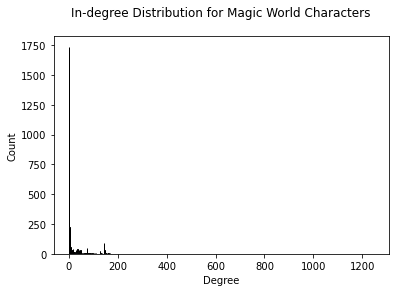

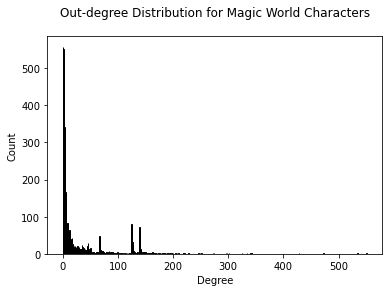

In [14]:
# degree distribution
import collections
import matplotlib.pyplot as plt
in_degrees = [d for n,d in G.in_degree()]
out_degrees = [d for n,d in G.out_degree()]


def plot_degree_distribution(degrees,title):
    degreeCount = collections.Counter(degrees)
    degree, count = zip(*degreeCount.items())

    # plot
    width = 1.0
    plt.bar(degree,count, align='center', width=width,edgecolor ='black',color = 'lightblue')
#     plt.hist(degrees,bins=1000,edgecolor ='black',color = 'lightblue')
    plt.title(title,pad = 20.0)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.show()
    
print('In degree\tmax:{}\tmin:{}'.format(max(in_degrees),min(in_degrees)))
print('Out degree\tmax:{}\tmin:{}'.format(max(out_degrees),min(out_degrees)))
print('Nodes with in-degree larger than 100: {}'.format(len([i for i in in_degrees if i >100])))
plot_degree_distribution(in_degrees,'In-degree Distribution for Magic World Characters')
plot_degree_distribution(out_degrees,'Out-degree Distribution for Magic World Characters')

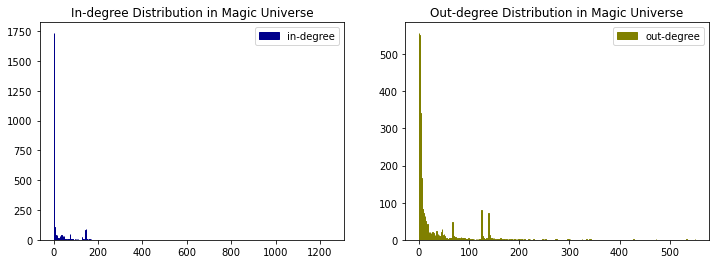

In [15]:

degreeCount = collections.Counter(in_degrees)
in_degree, in_count = zip(*degreeCount.items())
degreeCount = collections.Counter(out_degrees)
out_degree, out_count = zip(*degreeCount.items())
width = 1.0
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.bar(in_degree,in_count, align='center', width=width,edgecolor ='darkblue',color = 'darkblue',label='in-degree')
plt.title('In-degree Distribution in Magic Universe')
plt.legend()
plt.subplot(1,2,2)
plt.bar(out_degree,out_count, align='center', width=width,edgecolor ='olive',color = 'olive',label='out-degree')
plt.legend()
plt.title('Out-degree Distribution in Magic Universe')
plt.savefig('./magic_degree_dis.png')
plt.show()

In [16]:
from community import community_louvain
G_undirect = GCC.to_undirected()
partition = community_louvain.best_partition(G_undirect,random_state=2020)

In [17]:
partition

{'16th_century_Potions_Professor': 0,
 '1992_Gryffindor-Slytherin_Quidditch_match_spectators': 1,
 '1996_Gryffindor_Quidditch_Keeper_trials_spectators': 1,
 'A._Fenetre': 2,
 'A._Osborn': 1,
 'Abbott': 1,
 'Abel_Treetops': 3,
 'Aberforth_Dumbledore': 1,
 "Abernathy's_wand": 4,
 'Abernathy': 4,
 'Abigail_Nicola': 5,
 'Abigail_R._Cankus': 4,
 'Able_Fleming': 4,
 'Able_Spudmore': 1,
 'Abracadabra': 2,
 'Abraham': 1,
 'Abraham_Grimblehawk': 0,
 'Abraham_Peasegood': 1,
 'Abraham_Potter': 4,
 'Abraxas_Malfoy': 1,
 'Accusation_chair': 1,
 'Aceline_Faure': 1,
 'Achilles_Tolliver': 4,
 'Acolyte_thug': 4,
 'Acromantula': 1,
 'Action_figure': 1,
 'Actor_who_played_Crapaud': 6,
 'Actor_who_played_Grenouille': 6,
 'Adalbert_Waffling': 7,
 'Adam_Pickering': 1,
 'Addison_Fawley': 1,
 'Adrian': 2,
 'Adrian_Pucey': 5,
 'Adrian_Tutley': 1,
 'African_prince': 1,
 'Agatha_Chubb': 1,
 'Aged_witch': 1,
 'Agilbert_Fontaine': 4,
 "Agnes's_son": 8,
 'Agnes': 8,
 'Agnes_Monkleigh': 8,
 'Aidan_Kiely': 6,
 'Alain

In [18]:
par_class = set(partition.values())
par_class_dict = {}
for v in partition.values():
    str_v = str(v)
    if str_v not in par_class_dict.keys():
        par_class_dict[str_v] = 1
    else:
        par_class_dict[str_v] += 1
par_class_dict

{'0': 312,
 '1': 1841,
 '2': 93,
 '3': 110,
 '4': 238,
 '5': 217,
 '6': 205,
 '7': 238,
 '8': 58,
 '9': 52,
 '10': 5,
 '11': 56,
 '12': 13,
 '13': 67,
 '14': 60,
 '15': 26,
 '16': 54,
 '17': 5,
 '18': 3,
 '19': 8,
 '20': 6,
 '21': 4,
 '22': 3,
 '23': 6}

In [ ]:
import json
json_file = './data/cha_fandom_page/16th_century_Potions_Professor.json'
with open(json_file,'r') as f:
    text = json.load(f)

# print(text)
import re
pattern=re.compile(r'<a href="/wiki/.*?" title=".*?">')
result= pattern.findall(str(text))

list_href=[]
list_title=[]
print(type(result),len(result))
for x in result:
    x=x.split(' title')
    href=x[0].split('href="/wiki/')[-1].split('"')[0]
    title=x[1].split('="')[-1].split('"')[0]
    list_href.append(href)
    list_title.append(title)

    
print(list_href[:25])
print(list_title[:25])

In [161]:

# try out


baseurl = "https://harrypotter.fandom.com/api.php?"
action = "action=parse"
# prop = "prop=revisions&rvprop=content&rvparse=1"
format_ = "format=json"

each_cha  = 'Devil'
page = "page={}".format(cha_list_word)
query = "{}{}&{}&{}".format(baseurl, action, page,format_)

r = requests.get(query)
text= r.json()
print(text)
fandom_folder = './data/cha_fandom_page'
file_path = os.path.join(fandom_folder,file_saving_reading_name(each_cha)+'.json')

with open(file_path,'w') as f:
    json.dump(text,f)

{'parse': {'title': 'Devil', 'pageid': 95140, 'revid': 1293221, 'text': {'*': '<div class="mw-parser-output"><p>\n<aside role="region" class="portable-infobox pi-background pi-theme-spirit pi-layout-default">\n<figure class="pi-item pi-image" data-source="image">\n\t<a href="https://static.wikia.nocookie.net/harrypotter/images/4/4d/Devil.jpg/revision/latest?cb=20160605110157" class="image image-thumbnail"\n\t   title="">\n\t\t<img src="https://static.wikia.nocookie.net/harrypotter/images/4/4d/Devil.jpg/revision/latest/scale-to-width-down/286?cb=20160605110157" srcset="https://static.wikia.nocookie.net/harrypotter/images/4/4d/Devil.jpg/revision/latest/scale-to-width-down/286?cb=20160605110157 1x, https://static.wikia.nocookie.net/harrypotter/images/4/4d/Devil.jpg/revision/latest/scale-to-width-down/572?cb=20160605110157 2x" class="pi-image-thumbnail" alt="" width="270" height="441"\n\t\t     data-image-key="Devil.jpg" data-image-name="Devil.jpg"/>\n\t\t\n\t</a>\n\t\n</figure>\n<section 

In [42]:
url = 'https://harrypotter.fandom.com/wiki/Devil'
r = requests.get(url)
text= r.text

In [154]:
import requests
baseurl = "https://harrypotter.fandom.com/api.php?"

query = baseurl+'action=query&prop=revisions&titles=Devil&rvprop=content&rvparse=1&format=json'
r = requests.get(query)
text= r.json()

In [155]:
text

{'batchcomplete': '',
 'warnings': {'main': {'*': 'Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce> for notice of API deprecations and breaking changes.'},
  'revisions': {'*': 'The parameter "rvparse" has been deprecated.\nBecause "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used.'}},
 'query': {'pages': {'95140': {'pageid': 95140,
    'ns': 0,
    'title': 'Devil',
    'revisions': [{'*': '<div class="mw-parser-output"><p>\n<aside role="region" class="portable-infobox pi-background pi-theme-spirit pi-layout-default">\n<figure class="pi-item pi-image" data-source="image">\n\t<a href="https://static.wikia.nocookie.net/harrypotter/images/4/4d/Devil.jpg/revision/latest?cb=20160605110157" class="image image-thumbnail"\n\t   title="">\n\t\t<img src="https://static.wikia.nocookie.net/harrypotter/images/4/4d/Devi

In [ ]:
# 